# Radom forest for impact of different factors

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("datasets/cvd_smoke.csv")

In [3]:
pd.crosstab(df['cardio'],df['gender'],normalize=False)

gender,1,2
cardio,,
0,22914,12107
1,22616,12363


In [4]:
pd.crosstab(df['cardio'],df['smoke'],normalize=False)

smoke,0,1
cardio,,
0,31781,3240
1,32050,2929


In [5]:
pd.crosstab(df['cardio'],df['alco'],normalize=False)

alco,0,1
cardio,,
0,33080,1941
1,33156,1823


[]

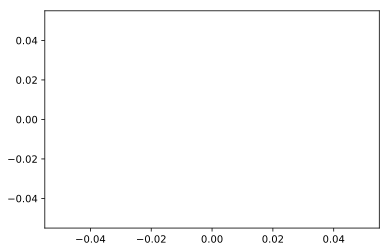

In [6]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot()

In [ ]:
df.head()

In [8]:
df_new =df

In [9]:
del df_new['smoke']

In [10]:
df_new['Alcohol'] = df_new['alco']

In [11]:
df_new['smoker'] = df_new['smoke']

KeyError: 'smoke'

In [12]:
df_new['CVD'] = df_new['cardio']

In [ ]:
df_new.head()

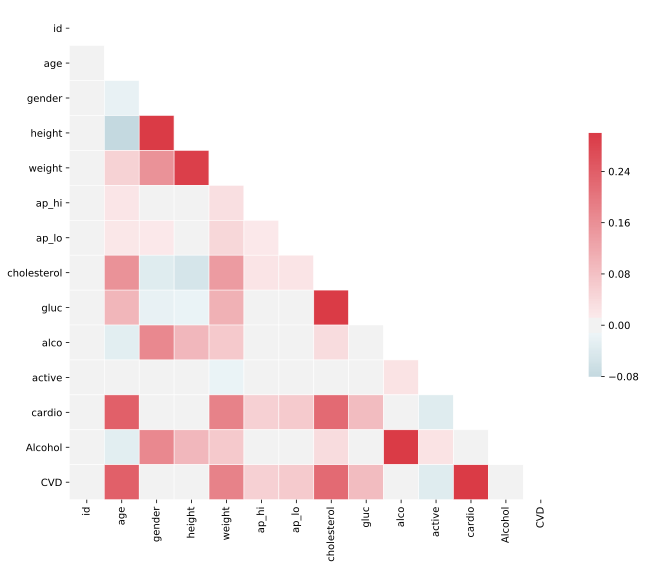

In [13]:
corr = df_new.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
plt.savefig("/Users/akshitchawla/Documents/FIT5120/tableau/correlation.svg")

In [ ]:
corr['cardio']

In [ ]:
df['years'] = (df['age'] / 365).round().astype('int')

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

In [ ]:
df['age'] = np.floor(df['age'] / 365.25)
# df['gender'] = df['gender'].map({1:0, 2:1})
# new_df = pd.get_dummies(df, columns=['cholesterol', 'gluc'])
# new_df.head()
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1),
                                                      df['cardio'],
                                                      test_size=0.3,
                                                      random_state=2019)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

In [ ]:
import matplotlib.pyplot as plt

features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))


importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);